In [1]:
from astropy import units as u
from astropy.time import Time

from poliastro.bodies import Sun, Earth, Mars, Jupiter
from poliastro.frames import Planes
from poliastro.ephem import Ephem
from poliastro.plotting import StaticOrbitPlotter
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver
from poliastro.util import time_range

/home/fbrunodr/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


([<matplotlib.lines.Line2D at 0x7fcb6152efe0>],
 <matplotlib.lines.Line2D at 0x7fcb6157c430>)

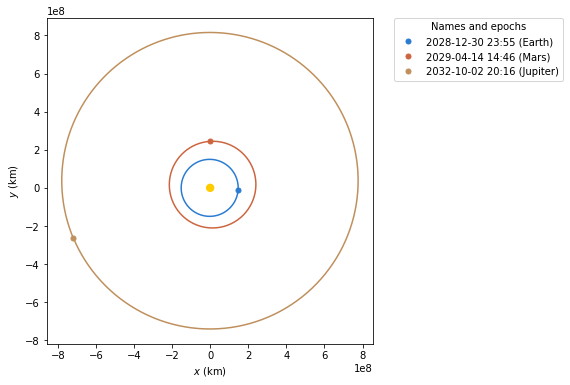

In [2]:
T0 = Time("J2000", scale="tdb") + 10591.49696003 * u.day
t1 = T0 + 104.6184648 * u.day
t2 = t1 + 1267.22930618 * u.day

plotter = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC)
plotter.plot_body_orbit(Earth, T0, label="Earth")
plotter.plot_body_orbit(Mars, t1, label="Mars")
plotter.plot_body_orbit(Jupiter, t2, label="Jupiter")

In [3]:
# Ephemerides
earth = Ephem.from_body(Earth, time_range(T0, end=T0), plane=Planes.EARTH_ECLIPTIC)
mars = Ephem.from_body(Mars, time_range(t1, end=t1), plane=Planes.EARTH_ECLIPTIC)
jupiter = Ephem.from_body(Jupiter, time_range(t2, end=t2), plane=Planes.EARTH_ECLIPTIC)

In [4]:
# First maneuver
ship = Orbit.from_ephem(Sun, earth, T0)
mars_orbit = Orbit.from_ephem(Sun, mars, t1)

first_maneuver = Maneuver.lambert(ship, mars_orbit)[0]
first_trajectory = ship.apply_maneuver([first_maneuver])
first_trajectory = Ephem.from_orbit(first_trajectory, time_range(T0, end=t1), plane=Planes.EARTH_ECLIPTIC)

In [5]:
# Second maneuver
ship = Orbit.from_ephem(Sun, mars, t1)
jupiter_orbit = Orbit.from_ephem(Sun, jupiter, t2)

second_maneuver = Maneuver.lambert(ship, jupiter_orbit)[0]
second_trajectory = ship.apply_maneuver([second_maneuver])
second_trajectory = Ephem.from_orbit(second_trajectory, time_range(t1, end=t2), plane=Planes.EARTH_ECLIPTIC)

([<matplotlib.lines.Line2D at 0x7fcb5cdbbc10>], None)

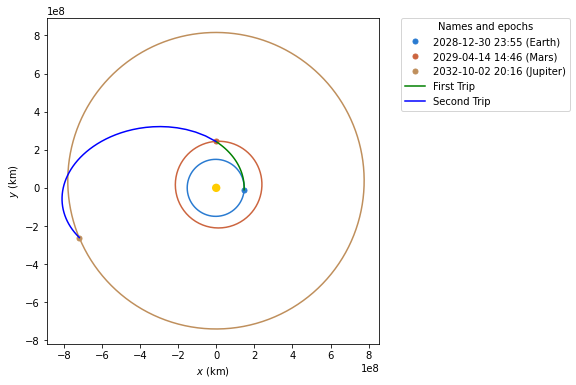

In [6]:
plotter = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC)
plotter.plot_body_orbit(Earth, T0, label="Earth")
plotter.plot_body_orbit(Mars, t1, label="Mars")
plotter.plot_body_orbit(Jupiter, t2, label="Jupiter")

plotter.plot_ephem(first_trajectory, label="First Trip", color='green')
plotter.plot_ephem(second_trajectory, label="Second Trip", color='blue')